In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from textwrap import wrap
from datetime import datetime

In [121]:
df = pd.read_csv('/content/drive/MyDrive/Juan/6054.csv')
df

,M0.1,M0.2,M0.3,M0.4,M0.5,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M2.1,M2.2,M2.3,M2.4,M2.5,M3.1,M3.2,M3.3,M3.4,M3.5,M3.6,M3.7,M3.8,M3.9,M3.10,Año
0,16479059.00,84303437.00,100782496.00,0.00,100782496.00,84303.44,39307.08,36580.71,20986.83,15593.87,60293.91,148268617.00,42218041.00,44970669.00,144597348.00,189568017.00,227067012.00,61063877.00,71045579.00,189568017.00,7556404.00,13879199.00,274492795.00,481348405.00,274492795.00,275737039.00,493827761.00,1996
1,27731994.00,140061267.00,167793261.00,0.00,167793261.00,140061.27,69161.16,66592.06,42315.14,24276.92,111476.30,258149160.00,79387757.00,86087554.00,251537565.00,337625119.00,401463769.00,118805401.00,138624540.00,337625119.00,13580948.00,22305643.00,498555302.00,868518889.00,498555302.00,500999491.00,892975863.00,1997
2,31214926.00,147351608.20,178566534.20,0.00,178566534.20,147351.61,74076.03,71758.45,47903.41,23855.03,121979.45,276166185.20,92854800.00,99612772.00,269331053.20,368943825.20,437843959.20,143011975.00,167322151.00,368943825.20,15016860.00,24491898.00,560757874.20,1013123000.20,560757874.20,562653576.20,1040608664.20,1998
3,29991109.00,143889607.23,173880716.23,0.00,173880716.23,143889.61,71006.29,70372.84,43772.03,26600.81,114778.32,267062439.23,91849246.00,98574119.00,258667923.23,357242042.23,432259790.23,146184871.00,161540287.00,357242042.23,17955027.00,27785937.00,546568266.23,1069884005.23,546568266.23,548916846.23,1096461504.23,1999
4,28373995.00,138265176.36,166639171.36,0.00,166639171.36,138265.18,68193.67,70499.35,45912.97,24586.39,114106.64,260600914.36,90740074.00,97867764.00,252371816.36,350239580.36,424637848.36,140662494.00,155936867.00,350239580.36,19613323.00,29634032.00,535810479.36,1104668618.36,535810479.36,538062346.36,1136842730.36,2000
5,25403830.00,122004864.38,147408694.38,8275984.00,155684678.38,122004.86,62208.02,54054.65,28875.61,25179.04,91083.63,227196517.38,72258647.00,76613480.00,213088496.38,289701976.38,380525450.38,109254851.00,119210680.00,289701976.38,18618844.00,29162832.00,438075488.38,1013101855.38,438075488.38,439185115.38,1042068790.38,2001
6,22614276.00,154796329.00,177410605.00,85701098.00,263111703.00,154796.33,121172.98,52383.06,27020.17,25362.89,148193.15,307737370.00,129090263.00,137033385.00,302989482.00,440022867.00,451789250.00,333832083.00,351755016.00,440022867.00,105272464.00,121251690.00,913029573.00,950607328.00,913029573.00,916268452.00,954252836.00,2002
7,33698039.00,242900699.00,276598738.00,169380517.00,445979255.00,242900.70,145584.12,89845.03,60731.84,29113.19,206315.95,455765625.00,123271408.00,136874704.00,449216653.00,586091357.00,602054667.00,422686236.00,467792629.00,586091357.00,82638583.00,102482639.00,1156366625.00,1206100343.00,1156366625.00,1159341061.00,1209248846.00,2003
8,42673299.00,333163763.00,375837062.00,196068975.00,571906037.00,333163.76,199886.61,160866.22,128410.72,32455.50,328297.33,666623844.00,194917442.00,236982354.00,661461089.00,898443443.00,952089137.00,373740987.00,474404337.00,898443443.00,77264782.00,101184162.00,1474031942.00,1588609829.00,1474031942.00,1477460254.00,1592097613.00,2004
9,51179771.00,428730179.00,479909950.00,151805919.00,631715869.00,428730.18,248141.94,185968.79,135659.55,50309.24,383801.49,817785551.00,236103982.00,291519015.00,812531667.00,1104050682.00,1163068066.00,444472989.00,579581065.00,1104050682.00,67476557.00,98964089.00,1782595836.00,1920259863.00,1782595836.00,1788661095.00,1926427273.00,2005


In [3]:
df['Year'] = pd.to_datetime(df['Year'])
df.dtypes

Entity                                                                                                                                                                 object
Year                                                                                                                                                           datetime64[ns]
Agregados monetarios, saldos afin de mes, en miles de pesos - Base monetaria (M0) - Circulación monetaria - En entidades financieras                                  float64
Agregados monetarios, saldos afin de mes, en miles de pesos - Base monetaria (M0) - Circulación monetaria - Fuera del sistema financiero                              float64
Agregados monetarios, saldos afin de mes, en miles de pesos - Base monetaria (M0) - Circulación monetaria - Total                                                     float64
                                                                                                                                  

In [4]:
periodo = df['Year'] >= '1996-05-31'

In [5]:
columnas = ['Pais','Año',
            'M0.1','M0.2','M0.3','M0.4','M0.5',
            'M1.1','M1.2','M1.3','M1.4','M1.5','M1.6','M1.7',
            'M2.1','M2.2','M2.3','M2.4','M2.5',
            'M3.1','M3.2','M3.3','M3.4','M3.5','M3.6','M3.7','M3.8','M3.9','M3.10'
            ]

In [6]:
df = df[periodo].iloc[: , 0:29]
df.columns = columnas
df

,Pais,Año,M0.1,M0.2,M0.3,M0.4,M0.5,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M2.1,M2.2,M2.3,M2.4,M2.5,M3.1,M3.2,M3.3,M3.4,M3.5,M3.6,M3.7,M3.8,M3.9,M3.10
676,Argentina,1996-05-31,1889828.0,1.029466e+07,1.218449e+07,0.0,1.218449e+07,10294.661,4813.169,4433.352,2464.022,1969.330,7277.191,1.804225e+07,5.190031e+06,5.505296e+06,1.757185e+07,2.307715e+07,2.737832e+07,8.204573e+06,9.441724e+06,2.307715e+07,865730.0,1611278.0,3.413015e+07,5.846080e+07,3.413015e+07,3.424602e+07,5.996130e+07
677,Argentina,1996-06-30,2002782.0,1.080133e+07,1.280412e+07,0.0,1.280412e+07,10801.333,4863.990,4382.835,2388.992,1993.843,7252.982,1.851356e+07,5.487000e+06,5.842839e+06,1.805432e+07,2.389715e+07,2.820158e+07,8.008350e+06,9.202483e+06,2.389715e+07,945121.0,1801108.0,3.490074e+07,5.943016e+07,3.490074e+07,3.502797e+07,6.098368e+07
678,Argentina,1996-07-31,2279504.0,1.094057e+07,1.322007e+07,0.0,1.322007e+07,10940.570,4875.714,5079.574,3102.015,1977.559,7977.729,1.943881e+07,5.364544e+06,5.681014e+06,1.891830e+07,2.459931e+07,2.923878e+07,7.957076e+06,9.102800e+06,2.459931e+07,937520.0,1717293.0,3.541941e+07,6.047921e+07,3.541941e+07,3.553380e+07,6.208369e+07
679,Argentina,1996-08-31,1959351.0,1.041979e+07,1.237914e+07,0.0,1.237914e+07,10419.794,4683.669,4878.197,2930.687,1947.510,7614.356,1.848165e+07,5.141408e+06,5.467816e+06,1.803415e+07,2.350197e+07,2.831861e+07,7.205338e+06,8.466342e+06,2.350197e+07,899135.0,1634667.0,3.360298e+07,5.960804e+07,3.360298e+07,3.373675e+07,6.134000e+07
680,Argentina,1996-09-30,2176206.0,1.004551e+07,1.222172e+07,0.0,1.222172e+07,10045.513,4967.024,3558.985,1724.790,1834.195,6691.814,1.717280e+07,5.122467e+06,5.422147e+06,1.673733e+07,2.215947e+07,2.698668e+07,7.398446e+06,8.546628e+06,2.215947e+07,1011516.0,1891622.0,3.259772e+07,5.904066e+07,3.259772e+07,3.276168e+07,6.056694e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,Argentina,2021-03-31,269759855.0,1.558228e+09,1.827988e+09,604307373.0,2.432295e+09,1558228.058,1378887.710,820120.826,460851.583,359269.243,1839739.293,3.425966e+09,1.420424e+09,1.481951e+09,3.397967e+09,4.879919e+09,6.120733e+09,2.721639e+09,3.489111e+09,4.879919e+09,118943285.0,175740541.0,8.544770e+09,1.024830e+10,8.544770e+09,8.585678e+09,1.029545e+10
975,Argentina,2021-04-30,222850925.0,1.572898e+09,1.795749e+09,574365453.0,2.370115e+09,1572898.388,1370023.300,994425.319,580851.557,413573.762,1950874.857,3.551674e+09,1.427795e+09,1.491787e+09,3.523773e+09,5.015560e+09,6.278980e+09,2.854868e+09,3.679570e+09,5.015560e+09,111555206.0,170866468.0,8.865996e+09,1.060664e+10,8.865996e+09,8.923014e+09,1.066993e+10
976,Argentina,2021-05-31,221149167.0,1.640223e+09,1.861372e+09,655825182.0,2.517197e+09,1640222.865,1464948.060,1023451.184,573030.958,450420.226,2037979.017,3.707171e+09,1.466504e+09,1.543569e+09,3.678202e+09,5.221771e+09,6.522980e+09,2.859821e+09,3.730147e+09,5.221771e+09,130124049.0,201671312.0,9.153590e+09,1.093682e+10,9.153590e+09,9.215830e+09,1.100556e+10
977,Argentina,2021-06-30,227113928.0,1.789505e+09,2.016619e+09,718938701.0,2.735557e+09,1789504.674,1498969.224,931120.865,460681.295,470439.570,1959650.519,3.780359e+09,1.735477e+09,1.801365e+09,3.749155e+09,5.550521e+09,6.865816e+09,2.968101e+09,3.901703e+09,5.550521e+09,129601991.0,200343057.0,9.652567e+09,1.145543e+10,9.652567e+09,9.737040e+09,1.154642e+10


In [7]:
años = pd.DatetimeIndex(df['Año']).year
df = df.groupby(años, as_index=False).sum()
df

,M0.1,M0.2,M0.3,M0.4,M0.5,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M2.1,M2.2,M2.3,M2.4,M2.5,M3.1,M3.2,M3.3,M3.4,M3.5,M3.6,M3.7,M3.8,M3.9,M3.10
0,1.647906e+07,8.430344e+07,1.007825e+08,0.000000e+00,1.007825e+08,8.430344e+04,3.930708e+04,36580.705,20986.834,15593.871,6.029391e+04,1.482686e+08,4.221804e+07,4.497067e+07,1.445973e+08,1.895680e+08,2.270670e+08,6.106388e+07,7.104558e+07,1.895680e+08,7.556404e+06,1.387920e+07,2.744928e+08,4.813484e+08,2.744928e+08,2.757370e+08,4.938278e+08
1,2.773199e+07,1.400613e+08,1.677933e+08,0.000000e+00,1.677933e+08,1.400613e+05,6.916116e+04,66592.056,42315.140,24276.916,1.114763e+05,2.581492e+08,7.938776e+07,8.608755e+07,2.515376e+08,3.376251e+08,4.014638e+08,1.188054e+08,1.386245e+08,3.376251e+08,1.358095e+07,2.230564e+07,4.985553e+08,8.685189e+08,4.985553e+08,5.009995e+08,8.929759e+08
2,3.121493e+07,1.473516e+08,1.785665e+08,0.000000e+00,1.785665e+08,1.473516e+05,7.407603e+04,71758.449,47903.414,23855.035,1.219794e+05,2.761662e+08,9.285480e+07,9.961277e+07,2.693311e+08,3.689438e+08,4.378440e+08,1.430120e+08,1.673222e+08,3.689438e+08,1.501686e+07,2.449190e+07,5.607579e+08,1.013123e+09,5.607579e+08,5.626536e+08,1.040609e+09
3,2.999111e+07,1.438896e+08,1.738807e+08,0.000000e+00,1.738807e+08,1.438896e+05,7.100629e+04,70372.838,43772.025,26600.813,1.147783e+05,2.670624e+08,9.184925e+07,9.857412e+07,2.586679e+08,3.572420e+08,4.322598e+08,1.461849e+08,1.615403e+08,3.572420e+08,1.795503e+07,2.778594e+07,5.465683e+08,1.069884e+09,5.465683e+08,5.489168e+08,1.096462e+09
4,2.837400e+07,1.382652e+08,1.666392e+08,0.000000e+00,1.666392e+08,1.382652e+05,6.819367e+04,70499.355,45912.966,24586.389,1.141066e+05,2.606009e+08,9.074007e+07,9.786776e+07,2.523718e+08,3.502396e+08,4.246378e+08,1.406625e+08,1.559369e+08,3.502396e+08,1.961332e+07,2.963403e+07,5.358105e+08,1.104669e+09,5.358105e+08,5.380623e+08,1.136843e+09
5,2.540383e+07,1.220049e+08,1.474087e+08,8.275984e+06,1.556847e+08,1.220049e+05,6.220802e+04,54054.655,28875.613,25179.042,9.108363e+04,2.271965e+08,7.225865e+07,7.661348e+07,2.130885e+08,2.897020e+08,3.805255e+08,1.092549e+08,1.192107e+08,2.897020e+08,1.861884e+07,2.916283e+07,4.380755e+08,1.013102e+09,4.380755e+08,4.391851e+08,1.042069e+09
6,2.261428e+07,1.547963e+08,1.774106e+08,8.570110e+07,2.631117e+08,1.547963e+05,1.211730e+05,52383.056,27020.169,25362.887,1.481932e+05,3.077374e+08,1.290903e+08,1.370334e+08,3.029895e+08,4.400229e+08,4.517892e+08,3.338321e+08,3.517550e+08,4.400229e+08,1.052725e+08,1.212517e+08,9.130296e+08,9.506073e+08,9.130296e+08,9.162685e+08,9.542528e+08
7,3.369804e+07,2.429007e+08,2.765987e+08,1.693805e+08,4.459793e+08,2.429007e+05,1.455841e+05,89845.030,60731.836,29113.194,2.063160e+05,4.557656e+08,1.232714e+08,1.368747e+08,4.492167e+08,5.860914e+08,6.020547e+08,4.226862e+08,4.677926e+08,5.860914e+08,8.263858e+07,1.024826e+08,1.156367e+09,1.206100e+09,1.156367e+09,1.159341e+09,1.209249e+09
8,4.267330e+07,3.331638e+08,3.758371e+08,1.960690e+08,5.719060e+08,3.331638e+05,1.998866e+05,160866.216,128410.716,32455.500,3.282973e+05,6.666238e+08,1.949174e+08,2.369824e+08,6.614611e+08,8.984434e+08,9.520891e+08,3.737410e+08,4.744043e+08,8.984434e+08,7.726478e+07,1.011842e+08,1.474032e+09,1.588610e+09,1.474032e+09,1.477460e+09,1.592098e+09
9,5.117977e+07,4.287302e+08,4.799100e+08,1.518059e+08,6.317159e+08,4.287302e+05,2.481419e+05,185968.787,135659.552,50309.235,3.838015e+05,8.177856e+08,2.361040e+08,2.915190e+08,8.125317e+08,1.104051e+09,1.163068e+09,4.444730e+08,5.795811e+08,1.104051e+09,6.747656e+07,9.896409e+07,1.782596e+09,1.920260e+09,1.782596e+09,1.788661e+09,1.926427e+09


In [22]:
df['Año'] = ['1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

,M0.1,M0.2,M0.3,M0.4,M0.5,M1.1,M1.2,M1.3,M1.4,M1.5,M1.6,M1.7,M2.1,M2.2,M2.3,M2.4,M2.5,M3.1,M3.2,M3.3,M3.4,M3.5,M3.6,M3.7,M3.8,M3.9,M3.10,Año
0,16479059.00,84303437.00,100782496.00,0.00,100782496.00,84303.44,39307.08,36580.71,20986.83,15593.87,60293.91,148268617.00,42218041.00,44970669.00,144597348.00,189568017.00,227067012.00,61063877.00,71045579.00,189568017.00,7556404.00,13879199.00,274492795.00,481348405.00,274492795.00,275737039.00,493827761.00,1996
1,27731994.00,140061267.00,167793261.00,0.00,167793261.00,140061.27,69161.16,66592.06,42315.14,24276.92,111476.30,258149160.00,79387757.00,86087554.00,251537565.00,337625119.00,401463769.00,118805401.00,138624540.00,337625119.00,13580948.00,22305643.00,498555302.00,868518889.00,498555302.00,500999491.00,892975863.00,1997
2,31214926.00,147351608.20,178566534.20,0.00,178566534.20,147351.61,74076.03,71758.45,47903.41,23855.03,121979.45,276166185.20,92854800.00,99612772.00,269331053.20,368943825.20,437843959.20,143011975.00,167322151.00,368943825.20,15016860.00,24491898.00,560757874.20,1013123000.20,560757874.20,562653576.20,1040608664.20,1998
3,29991109.00,143889607.23,173880716.23,0.00,173880716.23,143889.61,71006.29,70372.84,43772.03,26600.81,114778.32,267062439.23,91849246.00,98574119.00,258667923.23,357242042.23,432259790.23,146184871.00,161540287.00,357242042.23,17955027.00,27785937.00,546568266.23,1069884005.23,546568266.23,548916846.23,1096461504.23,1999
4,28373995.00,138265176.36,166639171.36,0.00,166639171.36,138265.18,68193.67,70499.35,45912.97,24586.39,114106.64,260600914.36,90740074.00,97867764.00,252371816.36,350239580.36,424637848.36,140662494.00,155936867.00,350239580.36,19613323.00,29634032.00,535810479.36,1104668618.36,535810479.36,538062346.36,1136842730.36,2000
5,25403830.00,122004864.38,147408694.38,8275984.00,155684678.38,122004.86,62208.02,54054.65,28875.61,25179.04,91083.63,227196517.38,72258647.00,76613480.00,213088496.38,289701976.38,380525450.38,109254851.00,119210680.00,289701976.38,18618844.00,29162832.00,438075488.38,1013101855.38,438075488.38,439185115.38,1042068790.38,2001
6,22614276.00,154796329.00,177410605.00,85701098.00,263111703.00,154796.33,121172.98,52383.06,27020.17,25362.89,148193.15,307737370.00,129090263.00,137033385.00,302989482.00,440022867.00,451789250.00,333832083.00,351755016.00,440022867.00,105272464.00,121251690.00,913029573.00,950607328.00,913029573.00,916268452.00,954252836.00,2002
7,33698039.00,242900699.00,276598738.00,169380517.00,445979255.00,242900.70,145584.12,89845.03,60731.84,29113.19,206315.95,455765625.00,123271408.00,136874704.00,449216653.00,586091357.00,602054667.00,422686236.00,467792629.00,586091357.00,82638583.00,102482639.00,1156366625.00,1206100343.00,1156366625.00,1159341061.00,1209248846.00,2003
8,42673299.00,333163763.00,375837062.00,196068975.00,571906037.00,333163.76,199886.61,160866.22,128410.72,32455.50,328297.33,666623844.00,194917442.00,236982354.00,661461089.00,898443443.00,952089137.00,373740987.00,474404337.00,898443443.00,77264782.00,101184162.00,1474031942.00,1588609829.00,1474031942.00,1477460254.00,1592097613.00,2004
9,51179771.00,428730179.00,479909950.00,151805919.00,631715869.00,428730.18,248141.94,185968.79,135659.55,50309.24,383801.49,817785551.00,236103982.00,291519015.00,812531667.00,1104050682.00,1163068066.00,444472989.00,579581065.00,1104050682.00,67476557.00,98964089.00,1782595836.00,1920259863.00,1782595836.00,1788661095.00,1926427273.00,2005


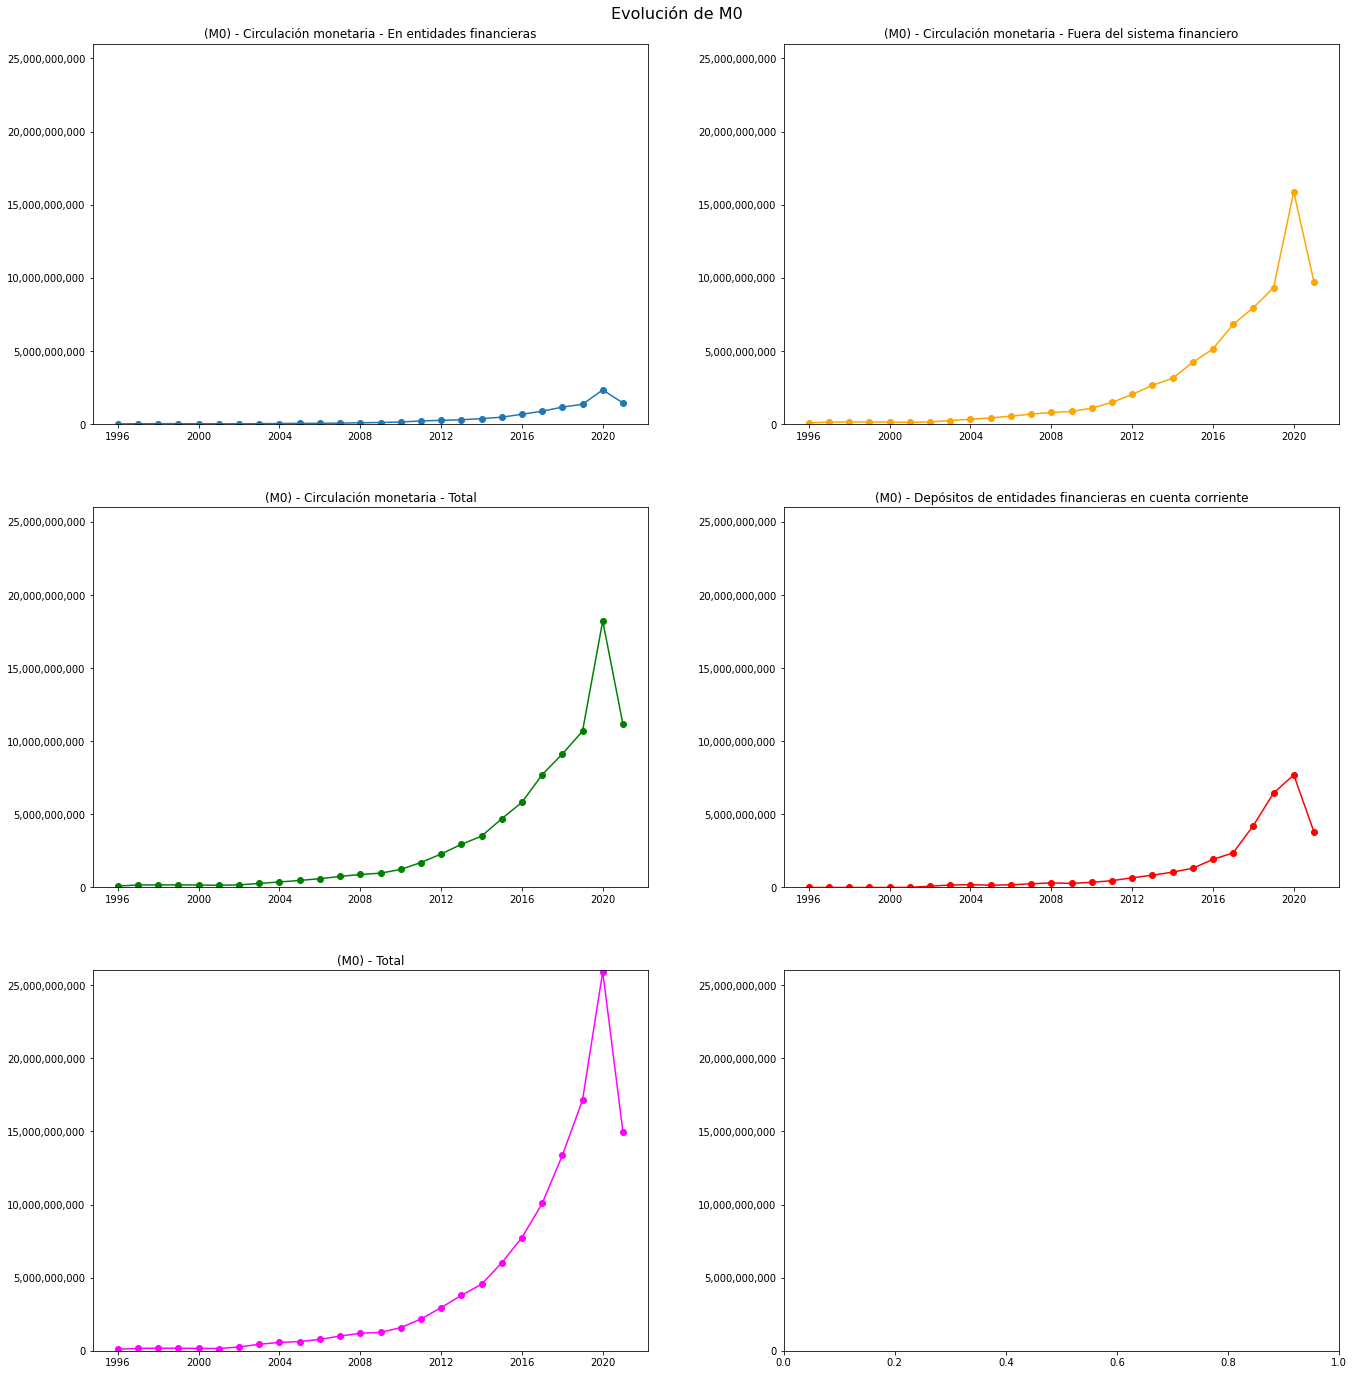

In [182]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(3,2)

plt.ticklabel_format(style='plain')

axs[0, 0].scatter(x, df['M0.1'])
axs[0, 0].plot(x, df['M0.1'])
axs[0, 0].set_title('(M0) - Circulación monetaria - En entidades financieras')
axs[0, 1].scatter(x, df['M0.2'], color='orange')
axs[0, 1].plot(x, df['M0.2'], color='orange')
axs[0, 1].set_title('(M0) - Circulación monetaria - Fuera del sistema financiero')
axs[1, 0].scatter(x, df['M0.3'], color='green')
axs[1, 0].plot(x, df['M0.3'], color='green')
axs[1, 0].set_title('(M0) - Circulación monetaria - Total')
axs[1, 1].scatter(x, df['M0.4'], color='red')
axs[1, 1].plot(x, df['M0.4'], color='red')
axs[1, 1].set_title('(M0) - Depósitos de entidades financieras en cuenta corriente')
axs[2, 0].scatter(x, df['M0.5'], color='magenta')
axs[2, 0].plot(x, df['M0.5'], color='magenta')
axs[2, 0].set_title('(M0) - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=26000000000)

fig.suptitle('Evolución de M0', fontsize=16)
fig.set_size_inches(20,20)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M0.png', bbox_inches='tight')

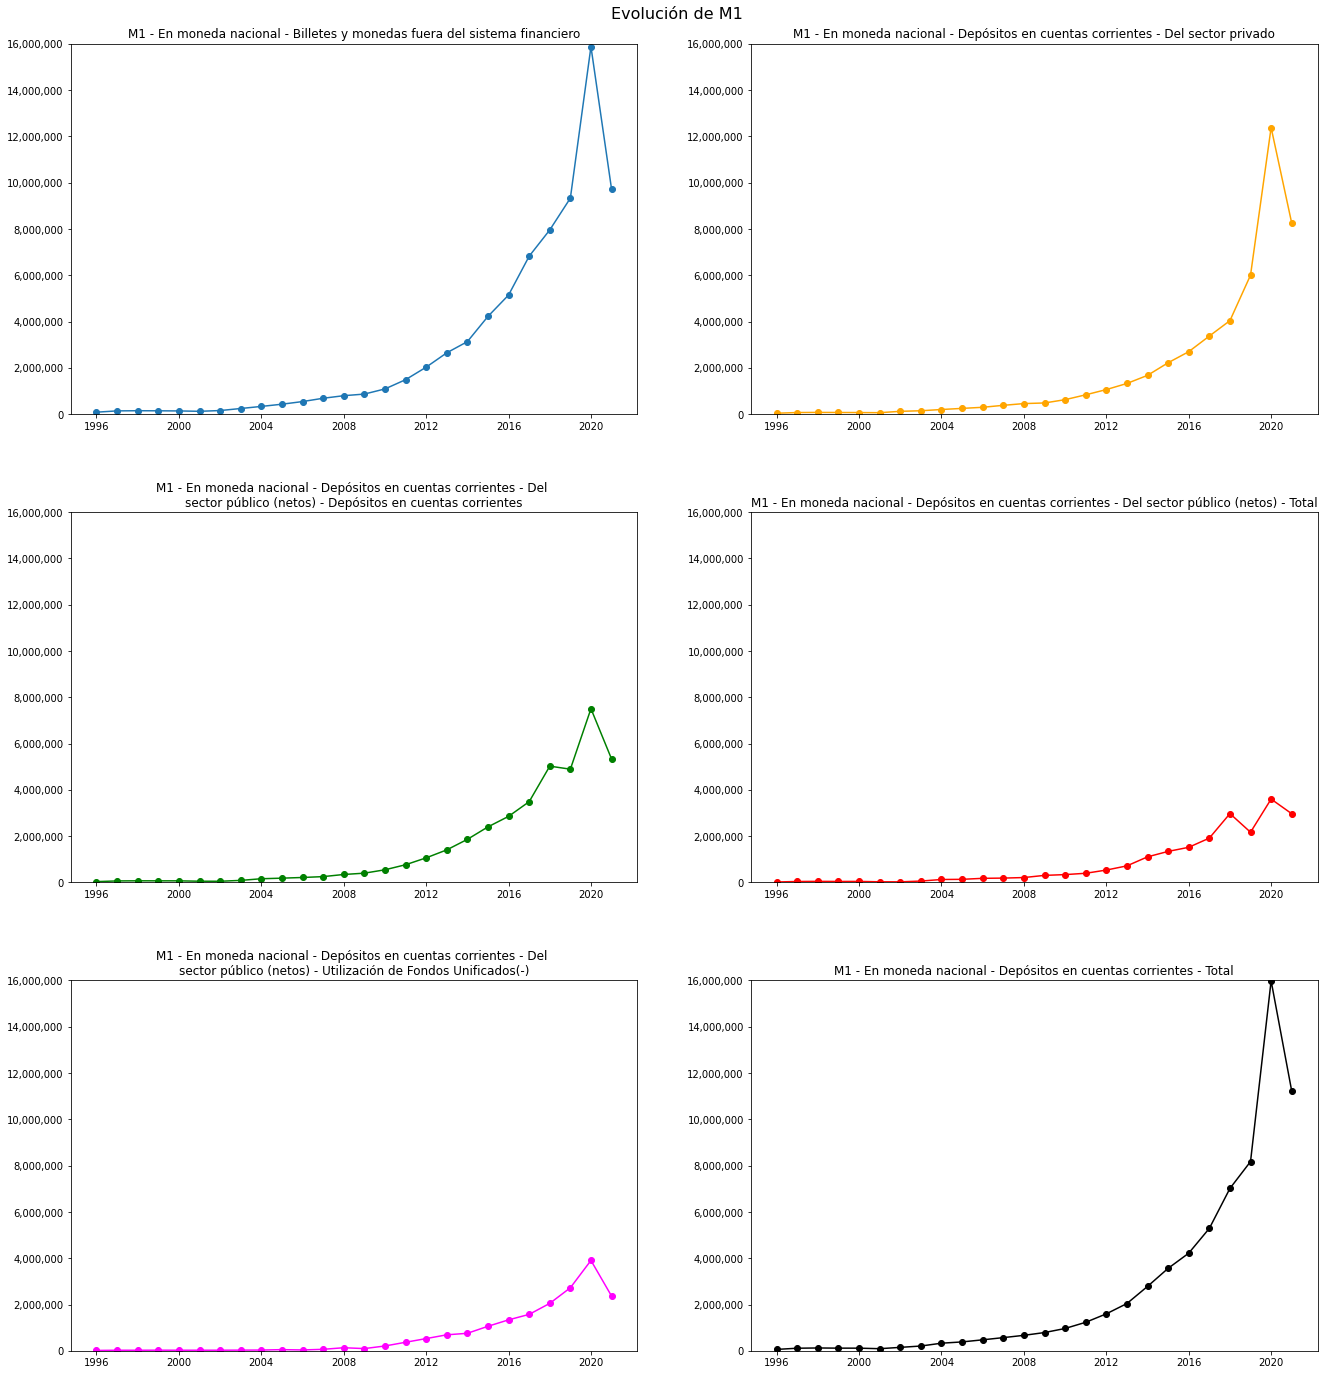

In [183]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(3,2)

plt.ticklabel_format(style='plain')

axs[0, 0].scatter(x, df['M1.1'])
axs[0, 0].plot(x, df['M1.1'])
axs[0, 0].set_title('M1 - En moneda nacional - Billetes y monedas fuera del sistema financiero')
axs[0, 1].scatter(x, df['M1.2'], color='orange')
axs[0, 1].plot(x, df['M1.2'], color='orange')
axs[0, 1].set_title('M1 - En moneda nacional - Depósitos en cuentas corrientes - Del sector privado')
axs[1, 0].scatter(x, df['M1.3'], color='green')
axs[1, 0].plot(x, df['M1.3'], color='green')
axs[1, 0].set_title('M1 - En moneda nacional - Depósitos en cuentas corrientes - Del \n%s' % "\n".join(wrap('sector público (netos) - Depósitos en cuentas corrientes', width=60)))
axs[1, 1].scatter(x, df['M1.4'], color='red')
axs[1, 1].plot(x, df['M1.4'], color='red')
axs[1, 1].set_title('M1 - En moneda nacional - Depósitos en cuentas corrientes - Del sector público (netos) - Total')
axs[2, 0].scatter(x, df['M1.5'], color='magenta')
axs[2, 0].plot(x, df['M1.5'], color='magenta')
axs[2, 0].set_title('M1 - En moneda nacional - Depósitos en cuentas corrientes - Del \n%s' % "\n".join(wrap('sector público (netos) - Utilización de Fondos Unificados(-)', width=60)))
axs[2, 1].scatter(x, df['M1.6'], color='black')
axs[2, 1].plot(x, df['M1.6'], color='black')
axs[2, 1].set_title('M1 - En moneda nacional - Depósitos en cuentas corrientes - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=16000000)
    
fig.suptitle('Evolución de M1', fontsize=16)
fig.set_size_inches(20,20)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M1.png', bbox_inches='tight')

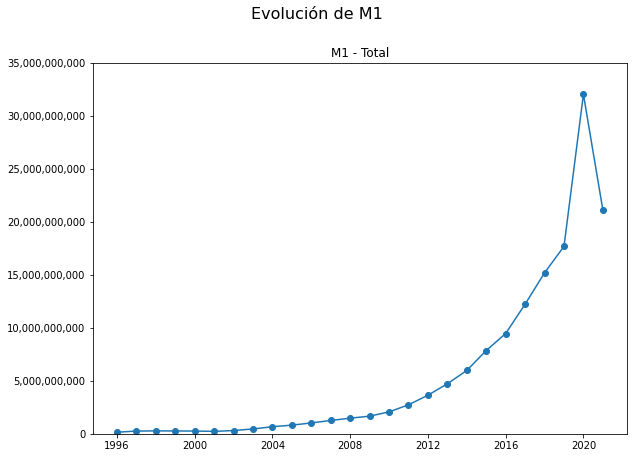

In [184]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots()

axs.scatter(x,df['M1.7'])
axs.plot(x, df['M1.7'])
axs.set_title('M1 - Total')

axs.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axs.set_ylim(bottom=0,top=35000000000)
    
fig.suptitle('Evolución de M1', fontsize=16)
fig.set_size_inches(10,7)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M1_1.png', bbox_inches='tight')


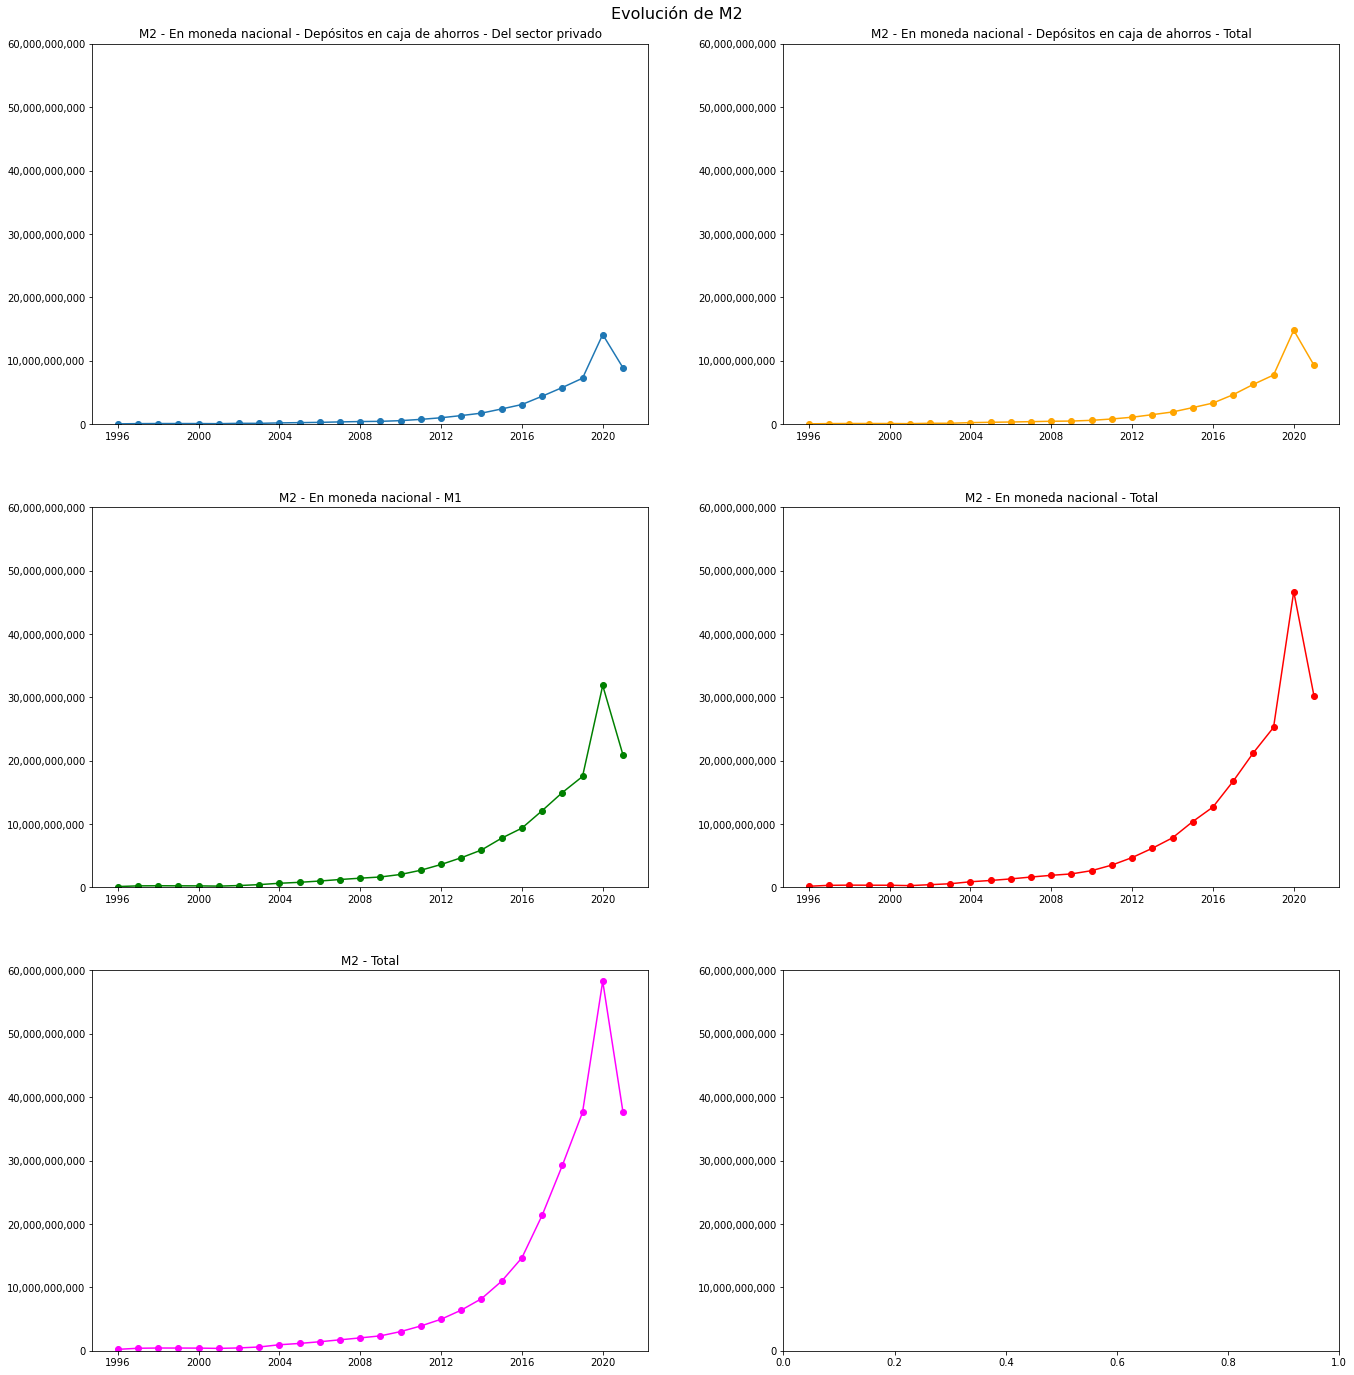

In [185]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(3,2)

plt.ticklabel_format(style='plain')

axs[0, 0].scatter(x, df['M2.1'])
axs[0, 0].plot(x, df['M2.1'])
axs[0, 0].set_title('M2 - En moneda nacional - Depósitos en caja de ahorros - Del sector privado')
axs[0, 1].scatter(x, df['M2.2'], color='orange')
axs[0, 1].plot(x, df['M2.2'], color='orange')
axs[0, 1].set_title('M2 - En moneda nacional - Depósitos en caja de ahorros - Total')
axs[1, 0].scatter(x, df['M2.3'], color='green')
axs[1, 0].plot(x, df['M2.3'], color='green')
axs[1, 0].set_title('M2 - En moneda nacional - M1')
axs[1, 1].scatter(x, df['M2.4'], color='red')
axs[1, 1].plot(x, df['M2.4'], color='red')
axs[1, 1].set_title('M2 - En moneda nacional - Total')
axs[2, 0].scatter(x, df['M2.5'], color='magenta')
axs[2, 0].plot(x, df['M2.5'], color='magenta')
axs[2, 0].set_title('M2 - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=60000000000)

fig.suptitle('Evolución de M2', fontsize=16)
fig.set_size_inches(20,20)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M2.png', bbox_inches='tight')

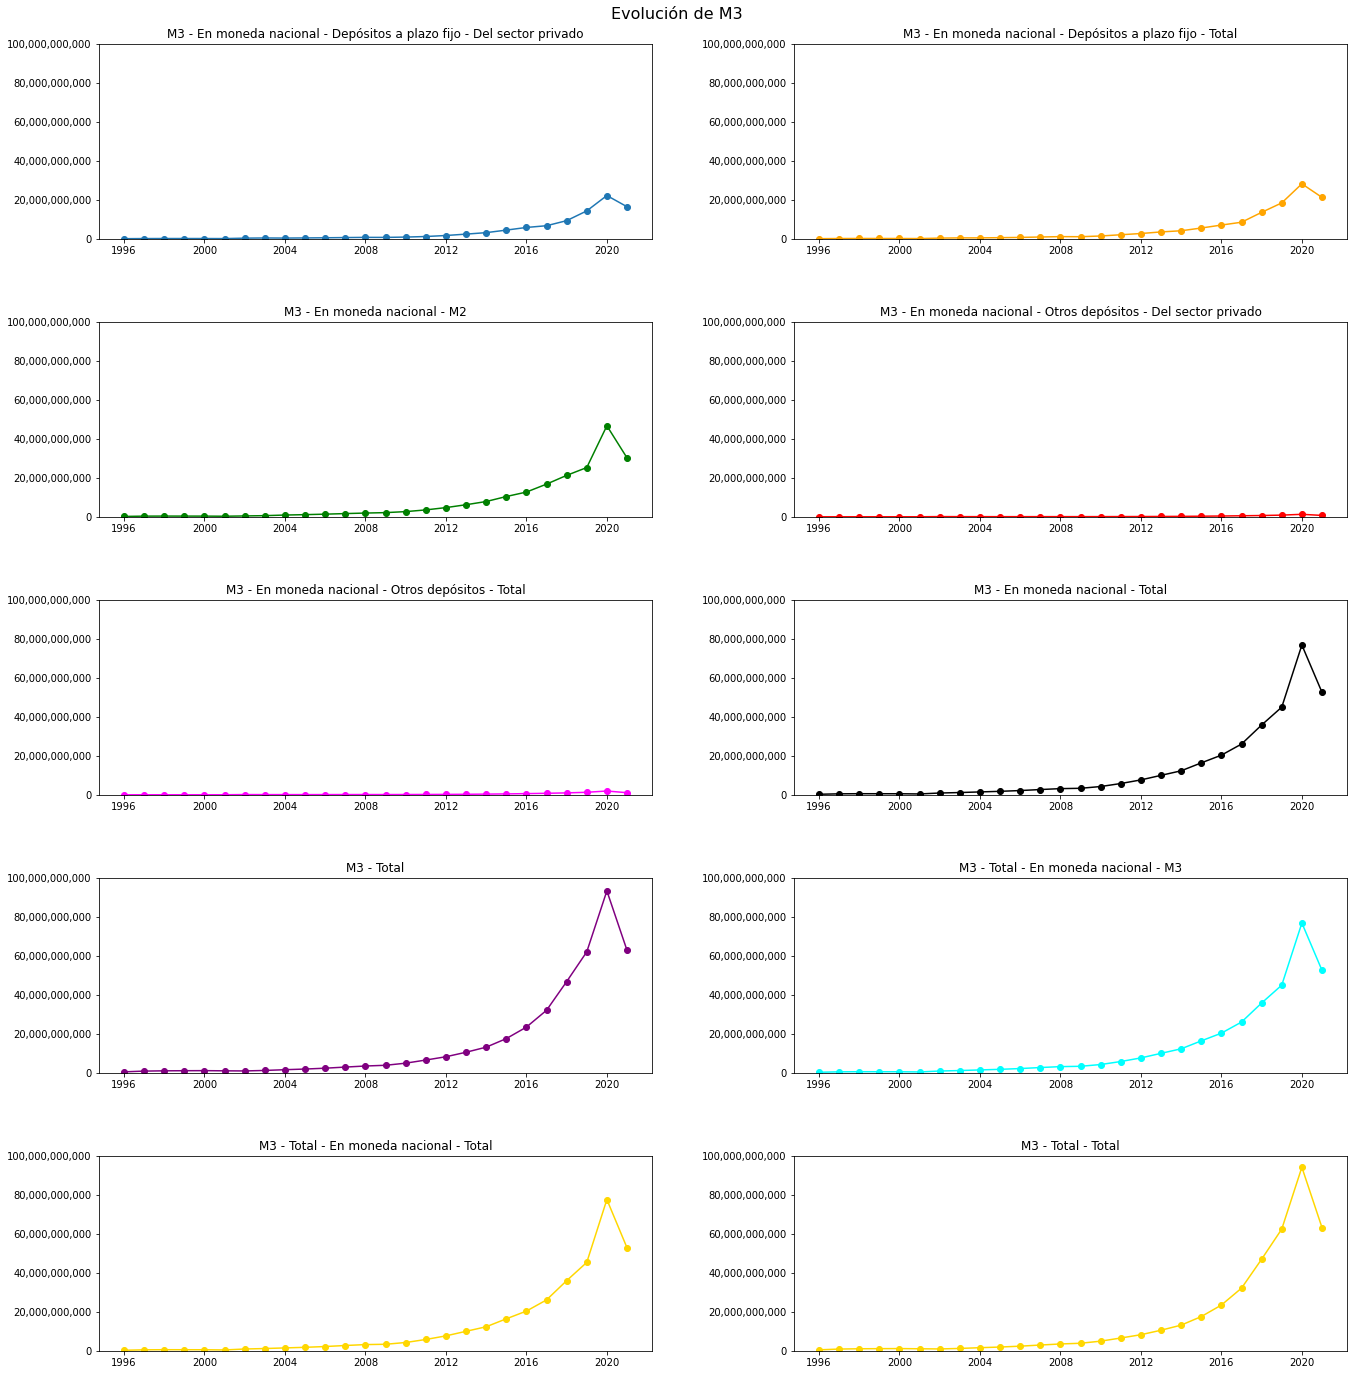

In [186]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(5,2)

plt.ticklabel_format(style='plain')

axs[0, 0].scatter(x, df['M3.1'])
axs[0, 0].plot(x, df['M3.1'])
axs[0, 0].set_title('M3 - En moneda nacional - Depósitos a plazo fijo - Del sector privado')
axs[0, 1].scatter(x, df['M3.2'], color='orange')
axs[0, 1].plot(x, df['M3.2'], color='orange')
axs[0, 1].set_title('M3 - En moneda nacional - Depósitos a plazo fijo - Total')
axs[1, 0].scatter(x, df['M3.3'], color='green')
axs[1, 0].plot(x, df['M3.3'], color='green')
axs[1, 0].set_title('M3 - En moneda nacional - M2')
axs[1, 1].scatter(x, df['M3.4'], color='red')
axs[1, 1].plot(x, df['M3.4'], color='red')
axs[1, 1].set_title('M3 - En moneda nacional - Otros depósitos - Del sector privado')
axs[2, 0].scatter(x, df['M3.5'], color='magenta')
axs[2, 0].plot(x, df['M3.5'], color='magenta')
axs[2, 0].set_title('M3 - En moneda nacional - Otros depósitos - Total')
axs[2, 1].scatter(x, df['M3.6'], color='black')
axs[2, 1].plot(x, df['M3.6'], color='black')
axs[2, 1].set_title('M3 - En moneda nacional - Total')
axs[3, 0].scatter(x, df['M3.7'], color='purple')
axs[3, 0].plot(x, df['M3.7'], color='purple')
axs[3, 0].set_title('M3 - Total')
axs[3, 1].scatter(x, df['M3.8'], color='cyan')
axs[3, 1].plot(x, df['M3.8'], color='cyan')
axs[3, 1].set_title('M3 - Total - En moneda nacional - M3')
axs[4, 0].scatter(x, df['M3.9'], color='gold')
axs[4, 0].plot(x, df['M3.9'], color='gold')
axs[4, 0].set_title('M3 - Total - En moneda nacional - Total')
axs[4, 1].scatter(x, df['M3.10'], color='gold')
axs[4, 1].plot(x, df['M3.10'], color='gold')
axs[4, 1].set_title('M3 - Total - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=100000000000)
    
fig.suptitle('Evolución de M3', fontsize=16)
fig.set_size_inches(20,20)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M3.png', bbox_inches='tight')

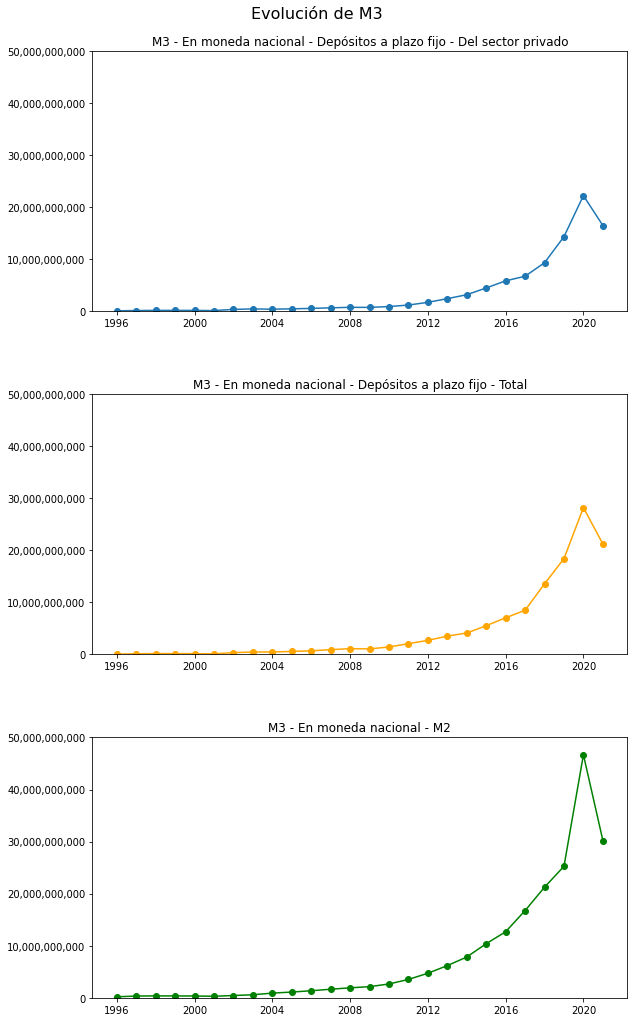

In [187]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(3)

plt.ticklabel_format(style='plain')

axs[0].scatter(x, df['M3.1'])
axs[0].plot(x, df['M3.1'])
axs[0].set_title('M3 - En moneda nacional - Depósitos a plazo fijo - Del sector privado')
axs[1].scatter(x, df['M3.2'], color='orange')
axs[1].plot(x, df['M3.2'], color='orange')
axs[1].set_title('M3 - En moneda nacional - Depósitos a plazo fijo - Total')
axs[2].scatter(x, df['M3.3'], color='green')
axs[2].plot(x, df['M3.3'], color='green')
axs[2].set_title('M3 - En moneda nacional - M2')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=50000000000)
    
fig.suptitle('Evolución de M3', fontsize=16)
fig.set_size_inches(10,15)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M3_1.png', bbox_inches='tight')

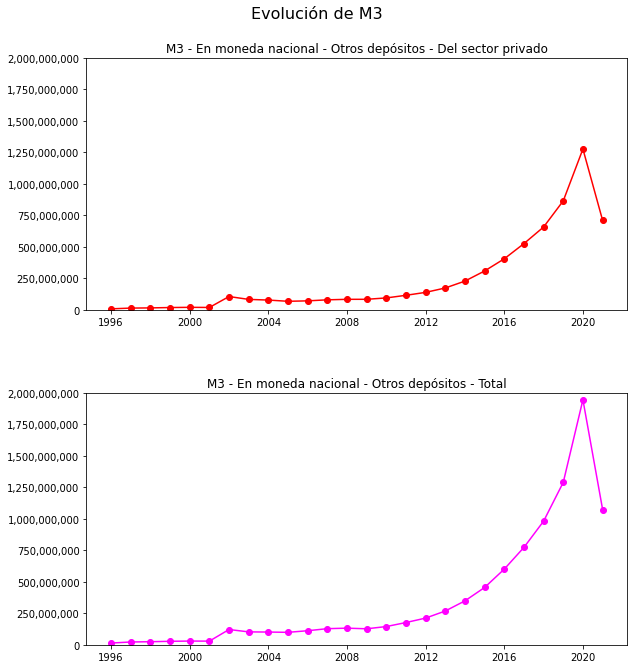

In [188]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(2)

axs[0].scatter(x, df['M3.4'], color='red')
axs[0].plot(x, df['M3.4'], color='red')
axs[0].set_title('M3 - En moneda nacional - Otros depósitos - Del sector privado')
axs[1].scatter(x, df['M3.5'], color='magenta')
axs[1].plot(x, df['M3.5'], color='magenta')
axs[1].set_title('M3 - En moneda nacional - Otros depósitos - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=2000000000)
    
fig.suptitle('Evolución de M3', fontsize=16)
fig.set_size_inches(10,10)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M3_2.png', bbox_inches='tight')

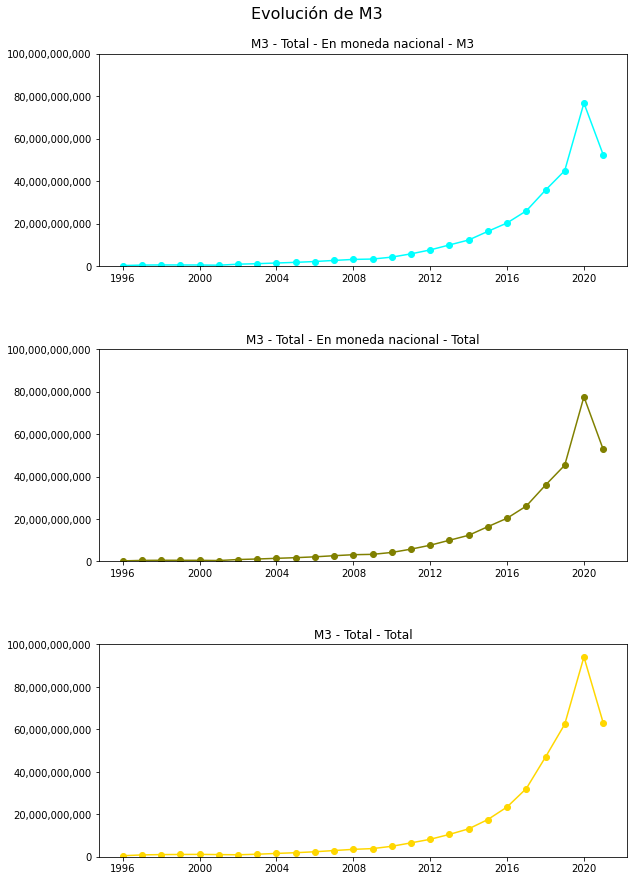

In [189]:
x=[datetime.strptime(date, "%Y").date() for date in df['Año']]
pd.options.display.float_format = '${:0,.0f}'.format
pd.set_option('display.float_format', lambda x: '%.2f' % x)
fig, axs = plt.subplots(3)

axs[0].scatter(x, df['M3.8'], color='cyan')
axs[0].plot(x, df['M3.8'], color='cyan')
axs[0].set_title('M3 - Total - En moneda nacional - M3')
axs[1].scatter(x, df['M3.9'], color='olive')
axs[1].plot(x, df['M3.9'], color='olive')
axs[1].set_title('M3 - Total - En moneda nacional - Total')
axs[2].scatter(x, df['M3.10'], color='gold')
axs[2].plot(x, df['M3.10'], color='gold')
axs[2].set_title('M3 - Total - Total')

for ax in axs.flat:
  ax.get_yaxis().set_major_formatter(
  matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
  ax.set_ylim(bottom=0,top=100000000000)
    
fig.suptitle('Evolución de M3', fontsize=16)
fig.set_size_inches(10,13)
fig.tight_layout(pad=5.0)
plt.savefig('/content/drive/MyDrive/Juan/M3_3.png', bbox_inches='tight')

In [190]:
df.to_csv('/content/drive/MyDrive/Juan/Agregados_Monetarios.csv')